In [7]:
import numpy as np
import matplotlib.pylab as plt
import utils as u
from datetime import datetime
from datetime import timedelta
import cv2
from DCT import custom_dct2

In [8]:
# plot setting
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

In [9]:
maxExp = 9
minExp = 5
dimensions = []
for e in range(minExp,maxExp+1):
    dimensions.append(10*2**(e))

timing = {
    "HomeMade": [],  # timing with our method
    "FFT": []  # timing with cv2 method (FFT)
}
timing2 = {
    "HomeMade": [],  # timing with our method
    "FFT": []  # timing with cv2 method
}
results = {
    "HomeMade": [],  # results with our method
    "FFT": []  # results with cv2 method
}

In [ ]:
for n in dimensions:
    print(n)
    matrix = np.random.randint(0, 256, size=(n, n))
    t0 = datetime.now()
    results["FFT"].append(cv2.dct(np.float32(matrix)))
    t1 = datetime.now()
    results["HomeMade"].append(custom_dct2(np.float32(matrix)))
    t2 = datetime.now()

    timing["HomeMade"].append(t2 - t1)
    timing["FFT"].append(t1 - t0)

timing

In [11]:
for i in range(len(timing["HomeMade"])):
    timing["HomeMade"][i] = int(timing["HomeMade"][i].total_seconds() * 1e6)
    timing["FFT"][i] = int(timing["FFT"][i].total_seconds() * 1e6)

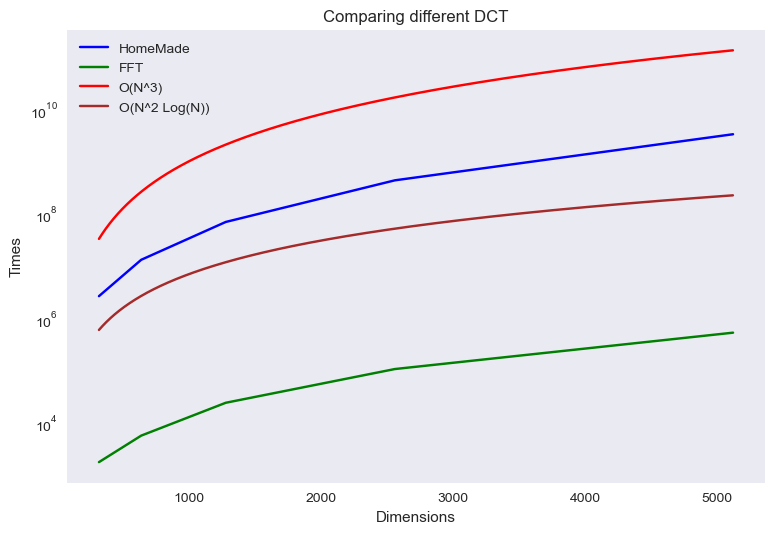

In [14]:

## DCT plot
for type in timing:
    if type == "FFT":
        col = "green"
    elif type == "HomeMade":
        col = "blue"
    plt.semilogy(dimensions, timing[type], color=col, label=type)
    
## Theorical plot
n=np.arange(min(dimensions), max(dimensions))
y3 = n**3
plt.semilogy(n, y3, color='red', label='O(N^3)')
y2l = (n**2)*np.log(n)
plt.semilogy(n, y2l, color='brown', label='O(N^2 Log(N))')

plt.xlabel('Dimensions')
plt.ylabel('Times')
plt.title('Comparing different DCT')
plt.legend()
plt.grid(False)
plt.show()